A rough conditional GAN implementation.

Main difference between a regular GAN and conditional GAN is the ability to control the produced output using the target label

In [1]:
from torch import nn
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision
from matplotlib import pyplot as plt
import numpy as np
from torch.autograd import Variable
from torchvision.utils import make_grid


In [2]:
#Defining Conditional GAN


class Discriminator(nn.Module):
  def __init__(self,n_label,embed_size,img_dim):
    super(Discriminator,self).__init__()
    self.embedding = nn.Embedding(n_label,embed_size)
    self.model = nn.Sequential(
      nn.Linear(img_dim+embed_size,1024),
      nn.LeakyReLU(0.2, inplace=True),
      nn.Dropout(0.3),
      nn.Linear(1024,512),
      nn.LeakyReLU(0.2, inplace=True),
      nn.Dropout(0.3),
      nn.Linear(512,256),
      nn.LeakyReLU(0.2, inplace=True),
      nn.Dropout(0.3),
      nn.Linear(256,1),
      nn.Sigmoid()
    )
  def forward(self,x,label):
    label_embedding = self.embedding(label.long())
    conditioned_input = torch.concat([x,label_embedding],dim=1)
    conditioned_output = self.model(conditioned_input) #p(X|Y)
    return conditioned_output


class Generator(nn.Module):
  def __init__(self,n_label, embed_size,img_dim,latent_dim):
    super(Generator,self).__init__()
    self.embedding = nn.Embedding(n_label,embed_size)
    self.model = nn.Sequential(
      nn.Linear(latent_dim+embed_size,128),
      nn.LeakyReLU(0.2, inplace=True),
      nn.Linear(128,256), #768 because of image size
      nn.Tanh(),
      nn.Linear(256,img_dim),
    )
  def forward(self,x,label):
    label_embedding = self.embedding(label.long())

    conditioned_input = torch.concat([x,label_embedding],dim=1) #Conditioning the target Y with X so p(X|Y)

    conditioned_output = self.model(conditioned_input)
    return conditioned_output #Z|Y

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# device = "cpu"
lr = 2e-4
latent_dim = 256
img_dim = 28*28*1 #MNIST - Datashape
batch_size = 32
num_epochs = 100
n_labels = 10
embed_size = 256 #label embedding size

In [4]:
gen = Generator(n_labels,embed_size,img_dim,latent_dim).to(device)
disc = Discriminator(n_labels,embed_size,img_dim).to(device)

In [5]:
opt_disc = torch.optim.Adam(disc.parameters(),lr=lr)
opt_gen = torch.optim.Adam(gen.parameters(),lr=lr)
criterion= nn.BCELoss()

In [6]:

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5),(0.5))]
)

In [7]:
dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


100%|██████████| 9912422/9912422 [00:00<00:00, 106373094.51it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 39716620.93it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32562993.60it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13415865.33it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Starting Epoch 0/100
[1000/1875]Disc loss : 0.29977136850357056 Gen Loss : 4.223412036895752


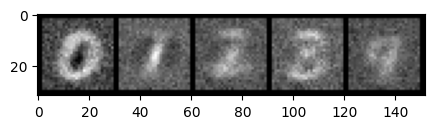

Starting Epoch 1/100
[1000/1875]Disc loss : 0.9578944444656372 Gen Loss : 1.0461796522140503


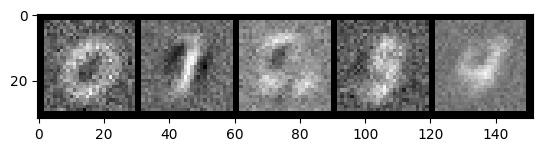

Starting Epoch 2/100
[1000/1875]Disc loss : 1.1853680610656738 Gen Loss : 1.713430404663086


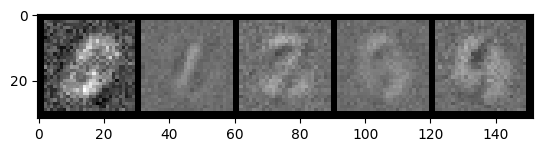

Starting Epoch 3/100
[1000/1875]Disc loss : 1.61153244972229 Gen Loss : 1.3272225856781006


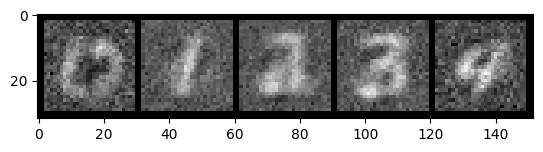

Starting Epoch 4/100
[1000/1875]Disc loss : 1.5622258186340332 Gen Loss : 1.3355510234832764


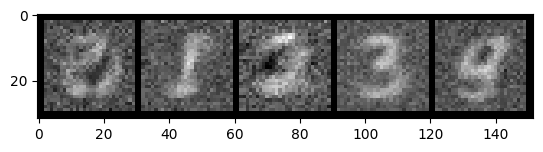

Starting Epoch 5/100
[1000/1875]Disc loss : 0.6763210892677307 Gen Loss : 1.5039016008377075


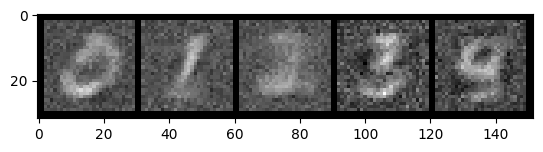

Starting Epoch 6/100
[1000/1875]Disc loss : 0.7789196968078613 Gen Loss : 1.6656553745269775


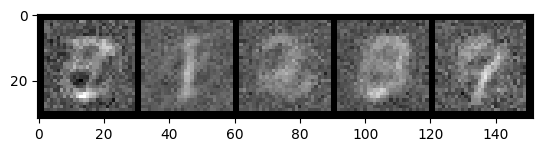

Starting Epoch 7/100
[1000/1875]Disc loss : 1.1425840854644775 Gen Loss : 1.275834321975708


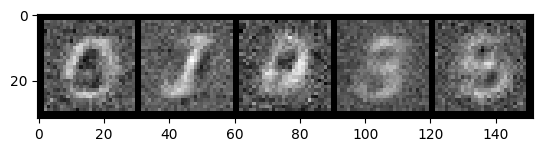

Starting Epoch 8/100
[1000/1875]Disc loss : 0.5544666051864624 Gen Loss : 1.5743203163146973


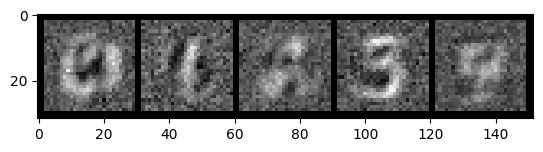

Starting Epoch 9/100
[1000/1875]Disc loss : 0.8435494303703308 Gen Loss : 1.4403237104415894


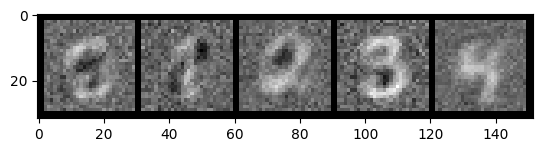

Starting Epoch 10/100
[1000/1875]Disc loss : 0.8254656791687012 Gen Loss : 1.360987663269043


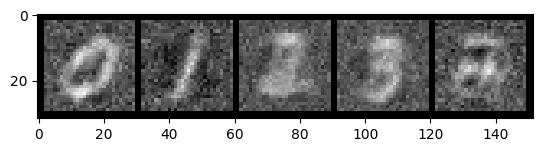

Starting Epoch 11/100
[1000/1875]Disc loss : 1.0861040353775024 Gen Loss : 1.4601081609725952


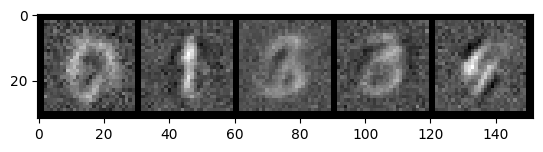

Starting Epoch 12/100
[1000/1875]Disc loss : 1.0034904479980469 Gen Loss : 1.2643766403198242


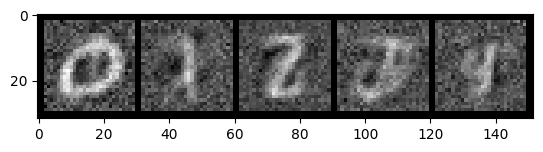

Starting Epoch 13/100
[1000/1875]Disc loss : 1.1166343688964844 Gen Loss : 1.1845221519470215


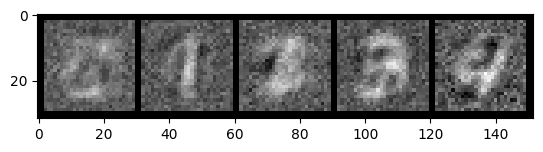

Starting Epoch 14/100
[1000/1875]Disc loss : 0.9646941423416138 Gen Loss : 1.4214916229248047


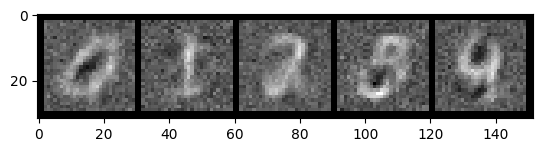

Starting Epoch 15/100
[1000/1875]Disc loss : 1.0770444869995117 Gen Loss : 1.0736494064331055


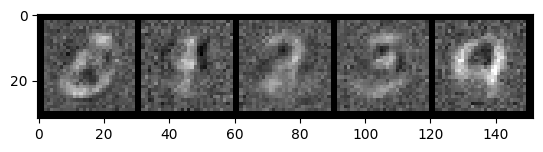

Starting Epoch 16/100
[1000/1875]Disc loss : 0.7904743552207947 Gen Loss : 1.672350525856018


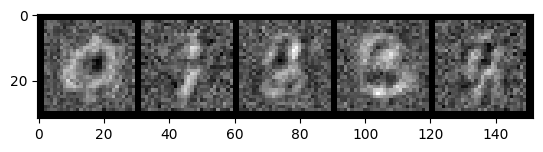

Starting Epoch 17/100
[1000/1875]Disc loss : 0.9410160779953003 Gen Loss : 1.3590000867843628


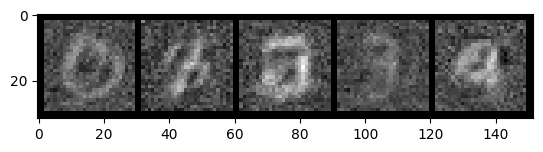

Starting Epoch 18/100
[1000/1875]Disc loss : 0.8072152733802795 Gen Loss : 1.9669981002807617


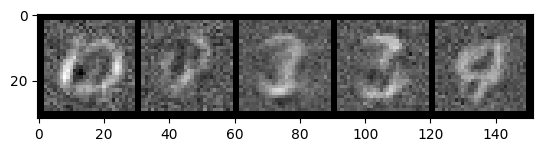

Starting Epoch 19/100
[1000/1875]Disc loss : 0.8615859746932983 Gen Loss : 1.2001090049743652


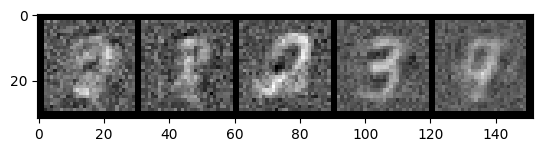

Starting Epoch 20/100
[1000/1875]Disc loss : 0.6548721194267273 Gen Loss : 1.854072093963623


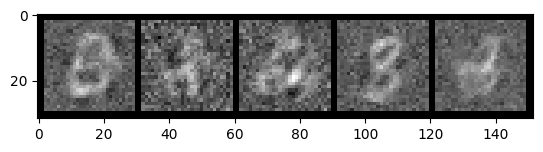

Starting Epoch 21/100
[1000/1875]Disc loss : 0.8847164511680603 Gen Loss : 1.5624701976776123


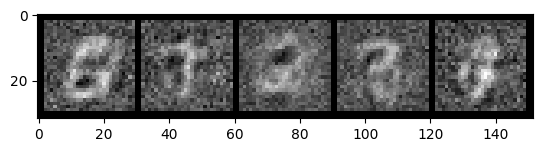

Starting Epoch 22/100
[1000/1875]Disc loss : 0.8902756571769714 Gen Loss : 1.7582075595855713


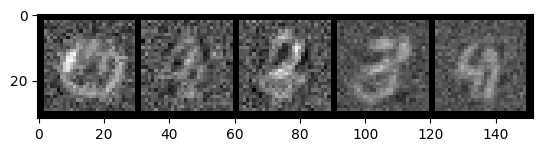

Starting Epoch 23/100
[1000/1875]Disc loss : 0.760290265083313 Gen Loss : 2.0674753189086914


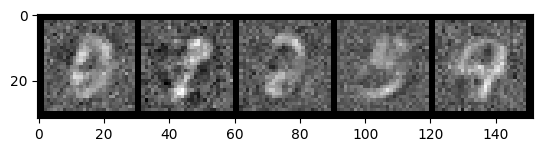

Starting Epoch 24/100
[1000/1875]Disc loss : 1.0912806987762451 Gen Loss : 1.727059245109558


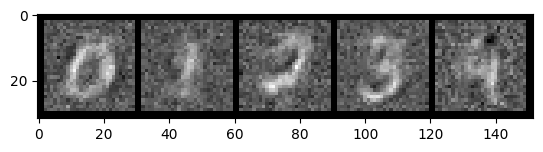

Starting Epoch 25/100
[1000/1875]Disc loss : 1.064863681793213 Gen Loss : 0.9748407602310181


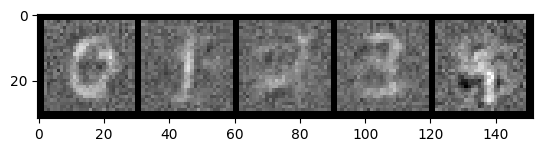

Starting Epoch 26/100
[1000/1875]Disc loss : 1.0525727272033691 Gen Loss : 1.217195749282837


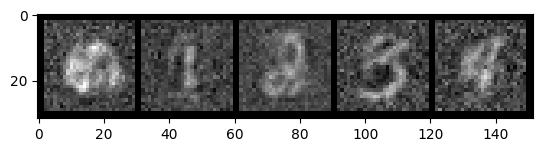

Starting Epoch 27/100
[1000/1875]Disc loss : 0.9374058842658997 Gen Loss : 1.9386022090911865


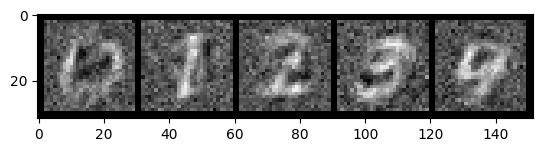

Starting Epoch 28/100
[1000/1875]Disc loss : 0.9179621934890747 Gen Loss : 1.9017951488494873


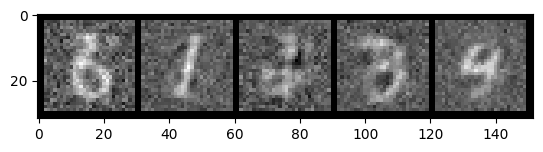

Starting Epoch 29/100
[1000/1875]Disc loss : 0.958937406539917 Gen Loss : 1.436253547668457


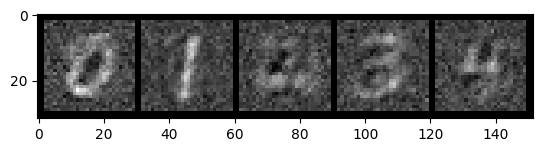

Starting Epoch 30/100
[1000/1875]Disc loss : 1.1559356451034546 Gen Loss : 1.4675471782684326


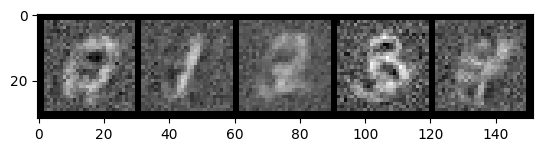

Starting Epoch 31/100
[1000/1875]Disc loss : 0.8021963834762573 Gen Loss : 1.7370491027832031


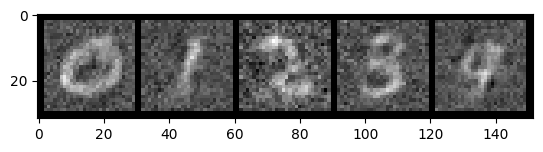

Starting Epoch 32/100
[1000/1875]Disc loss : 0.6663326025009155 Gen Loss : 1.574492335319519


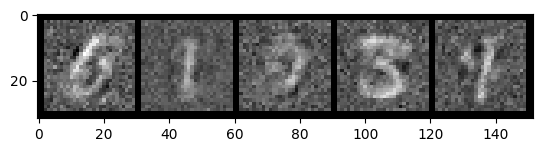

Starting Epoch 33/100
[1000/1875]Disc loss : 0.8221238851547241 Gen Loss : 2.1479711532592773


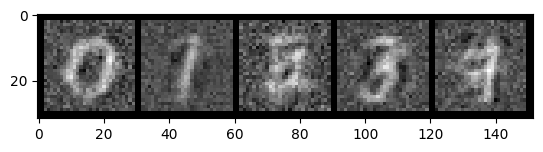

Starting Epoch 34/100
[1000/1875]Disc loss : 0.963123083114624 Gen Loss : 1.8228890895843506


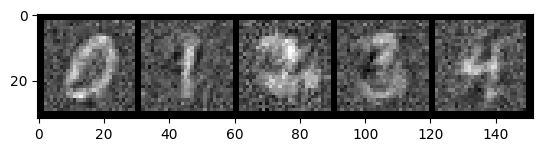

Starting Epoch 35/100
[1000/1875]Disc loss : 0.8851041793823242 Gen Loss : 1.671188473701477


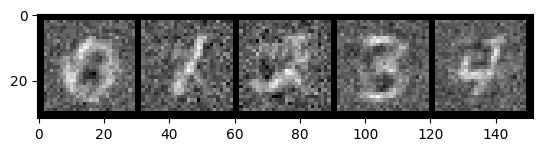

Starting Epoch 36/100
[1000/1875]Disc loss : 0.9872359037399292 Gen Loss : 1.6310088634490967


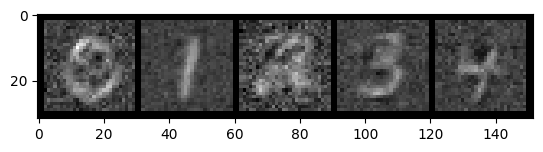

Starting Epoch 37/100
[1000/1875]Disc loss : 0.9144812822341919 Gen Loss : 1.6382291316986084


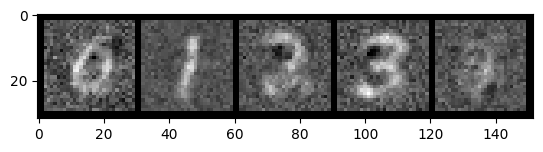

Starting Epoch 38/100
[1000/1875]Disc loss : 0.8131133317947388 Gen Loss : 2.017554759979248


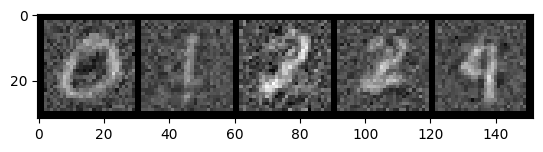

Starting Epoch 39/100
[1000/1875]Disc loss : 0.6539941430091858 Gen Loss : 1.677069902420044


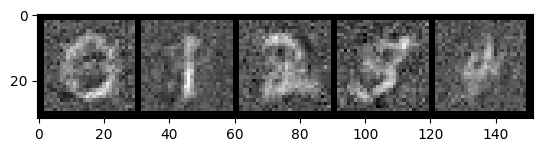

Starting Epoch 40/100
[1000/1875]Disc loss : 1.0765517950057983 Gen Loss : 1.4147412776947021


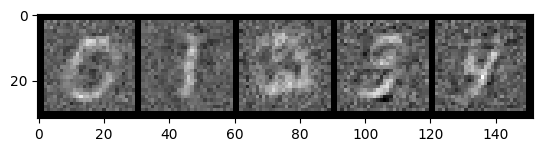

Starting Epoch 41/100
[1000/1875]Disc loss : 0.7925053238868713 Gen Loss : 1.4901598691940308


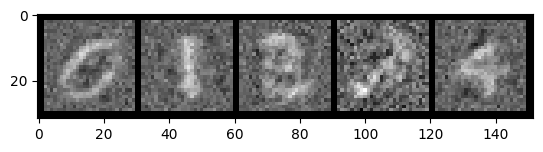

Starting Epoch 42/100
[1000/1875]Disc loss : 0.8815187215805054 Gen Loss : 1.6058781147003174


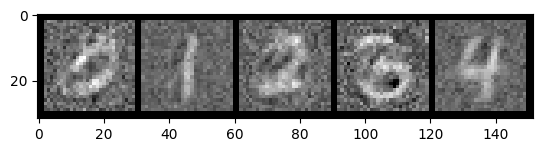

Starting Epoch 43/100
[1000/1875]Disc loss : 1.2659416198730469 Gen Loss : 1.5478553771972656


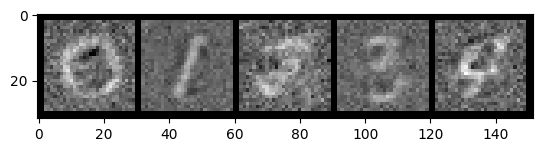

Starting Epoch 44/100
[1000/1875]Disc loss : 0.9124643206596375 Gen Loss : 1.6438517570495605


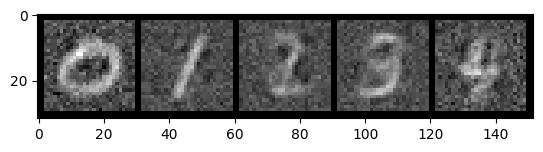

Starting Epoch 45/100
[1000/1875]Disc loss : 0.8521289229393005 Gen Loss : 1.7524166107177734


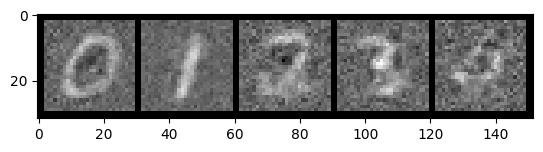

Starting Epoch 46/100
[1000/1875]Disc loss : 0.8676676750183105 Gen Loss : 1.5675404071807861


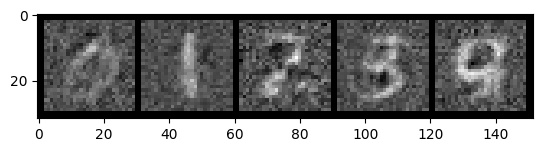

Starting Epoch 47/100
[1000/1875]Disc loss : 0.7399535179138184 Gen Loss : 1.6183412075042725


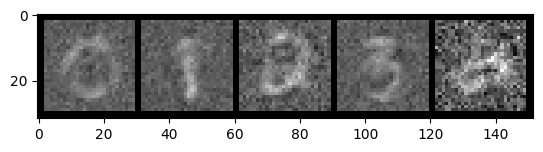

Starting Epoch 48/100
[1000/1875]Disc loss : 0.6538915038108826 Gen Loss : 1.6424338817596436


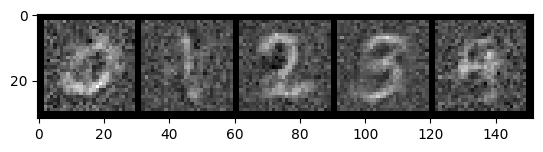

Starting Epoch 49/100
[1000/1875]Disc loss : 0.6620558500289917 Gen Loss : 1.782335638999939


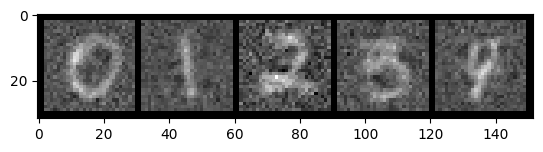

Starting Epoch 50/100
[1000/1875]Disc loss : 0.7043488025665283 Gen Loss : 2.1157050132751465


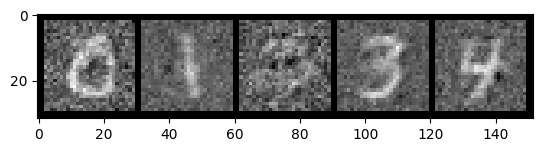

Starting Epoch 51/100
[1000/1875]Disc loss : 1.0988720655441284 Gen Loss : 1.544372797012329


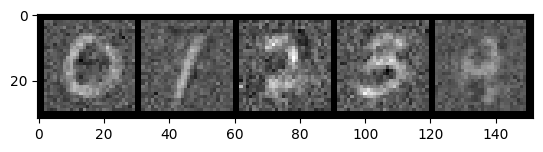

Starting Epoch 52/100
[1000/1875]Disc loss : 0.805501401424408 Gen Loss : 1.8231654167175293


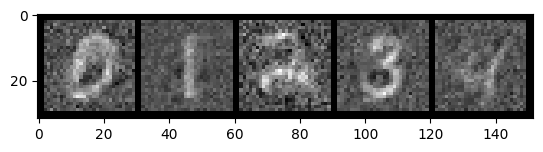

Starting Epoch 53/100
[1000/1875]Disc loss : 0.6363465189933777 Gen Loss : 1.6162819862365723


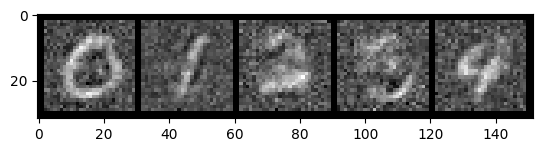

Starting Epoch 54/100
[1000/1875]Disc loss : 0.5560426115989685 Gen Loss : 2.1663260459899902


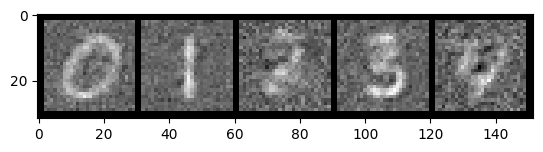

Starting Epoch 55/100
[1000/1875]Disc loss : 0.9826334714889526 Gen Loss : 1.979305386543274


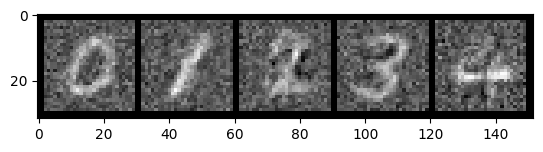

Starting Epoch 56/100
[1000/1875]Disc loss : 0.8382174968719482 Gen Loss : 1.735342264175415


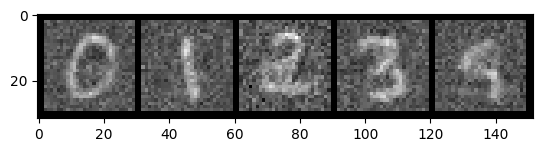

Starting Epoch 57/100
[1000/1875]Disc loss : 0.8637038469314575 Gen Loss : 1.9388554096221924


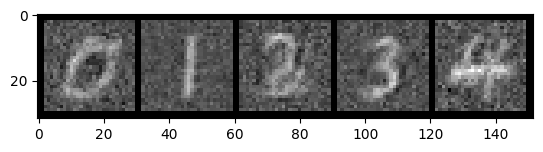

Starting Epoch 58/100
[1000/1875]Disc loss : 0.5996209979057312 Gen Loss : 1.8380157947540283


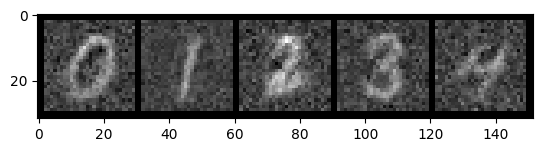

Starting Epoch 59/100
[1000/1875]Disc loss : 0.7572554349899292 Gen Loss : 2.2689709663391113


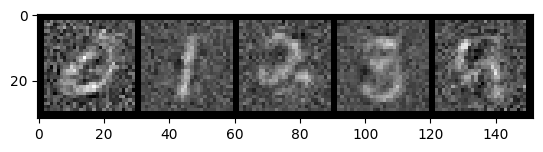

Starting Epoch 60/100
[1000/1875]Disc loss : 0.6572646498680115 Gen Loss : 2.164243698120117


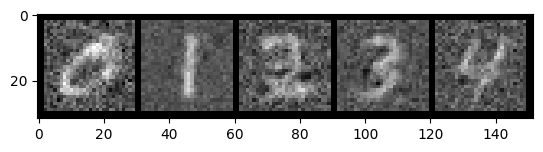

Starting Epoch 61/100
[1000/1875]Disc loss : 0.8460583686828613 Gen Loss : 2.4872350692749023


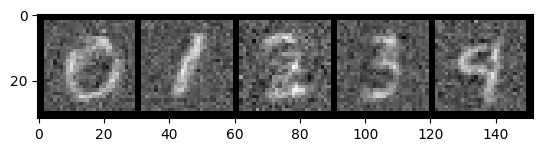

Starting Epoch 62/100
[1000/1875]Disc loss : 0.614843487739563 Gen Loss : 1.6971936225891113


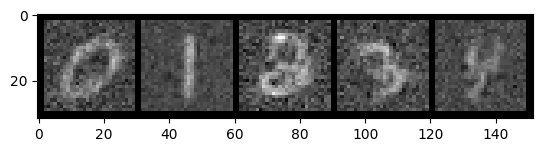

Starting Epoch 63/100
[1000/1875]Disc loss : 0.8047974109649658 Gen Loss : 1.9998407363891602


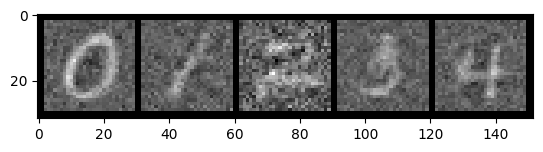

Starting Epoch 64/100
[1000/1875]Disc loss : 0.7188273072242737 Gen Loss : 1.95357346534729


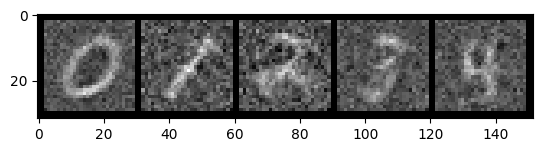

Starting Epoch 65/100
[1000/1875]Disc loss : 0.6459508538246155 Gen Loss : 2.206678867340088


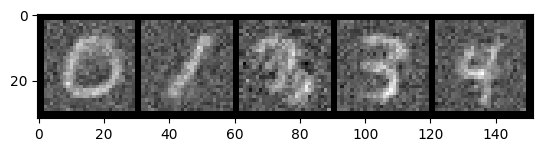

Starting Epoch 66/100
[1000/1875]Disc loss : 0.9106864929199219 Gen Loss : 1.8883897066116333


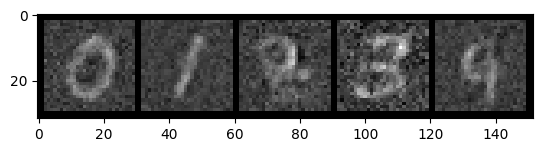

Starting Epoch 67/100
[1000/1875]Disc loss : 0.6173957586288452 Gen Loss : 1.8770204782485962


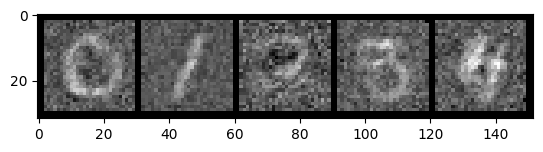

Starting Epoch 68/100
[1000/1875]Disc loss : 0.9195032119750977 Gen Loss : 2.8108115196228027


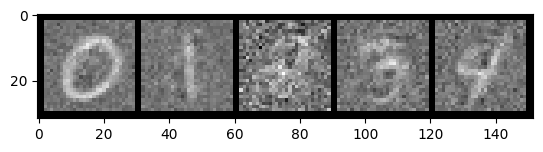

Starting Epoch 69/100
[1000/1875]Disc loss : 0.6022136211395264 Gen Loss : 2.1810336112976074


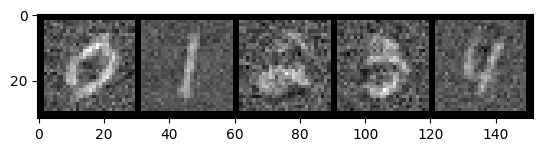

Starting Epoch 70/100
[1000/1875]Disc loss : 0.9189208745956421 Gen Loss : 1.76255464553833


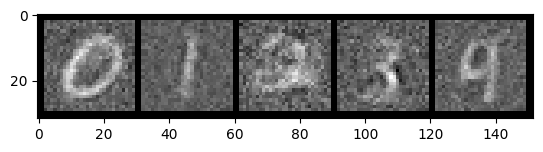

Starting Epoch 71/100
[1000/1875]Disc loss : 0.6701678037643433 Gen Loss : 2.3435823917388916


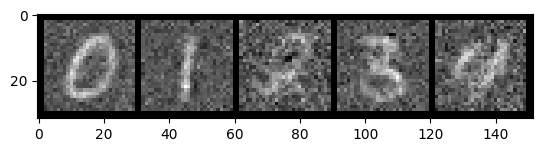

Starting Epoch 72/100
[1000/1875]Disc loss : 0.7762517333030701 Gen Loss : 2.4078471660614014


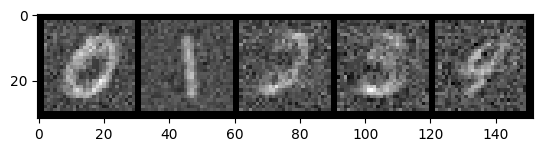

Starting Epoch 73/100
[1000/1875]Disc loss : 0.6579381823539734 Gen Loss : 2.244156837463379


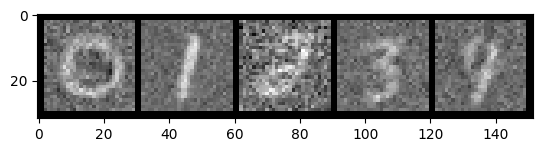

Starting Epoch 74/100
[1000/1875]Disc loss : 0.40873801708221436 Gen Loss : 2.10001277923584


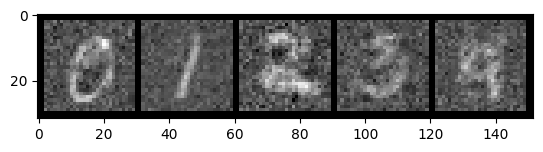

Starting Epoch 75/100
[1000/1875]Disc loss : 0.26278984546661377 Gen Loss : 2.5457098484039307


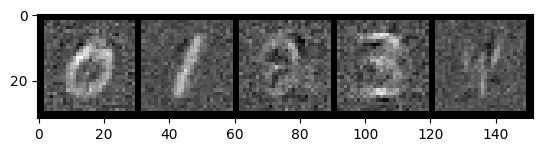

Starting Epoch 76/100
[1000/1875]Disc loss : 0.6025516390800476 Gen Loss : 2.3188986778259277


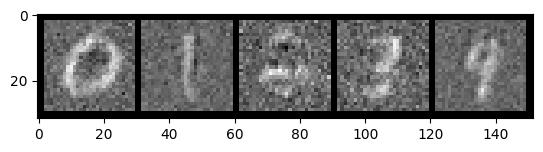

Starting Epoch 77/100
[1000/1875]Disc loss : 0.2685953378677368 Gen Loss : 2.0618896484375


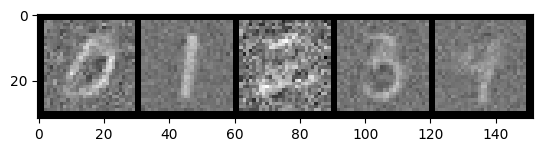

Starting Epoch 78/100
[1000/1875]Disc loss : 0.8508394956588745 Gen Loss : 2.458998680114746


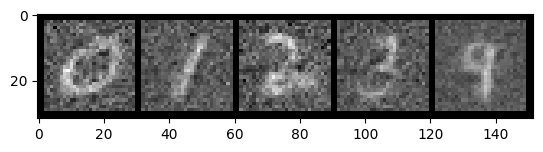

Starting Epoch 79/100
[1000/1875]Disc loss : 0.7014572620391846 Gen Loss : 2.566316604614258


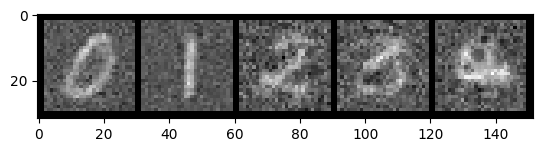

Starting Epoch 80/100
[1000/1875]Disc loss : 0.5096417665481567 Gen Loss : 3.007488250732422


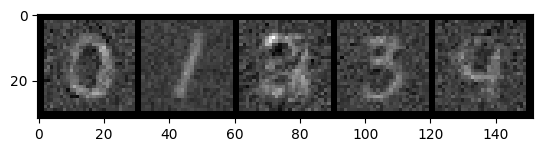

Starting Epoch 81/100
[1000/1875]Disc loss : 0.4922065734863281 Gen Loss : 2.592933177947998


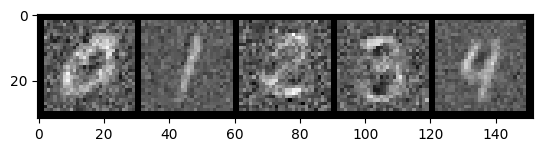

Starting Epoch 82/100
[1000/1875]Disc loss : 0.643362283706665 Gen Loss : 2.0380892753601074


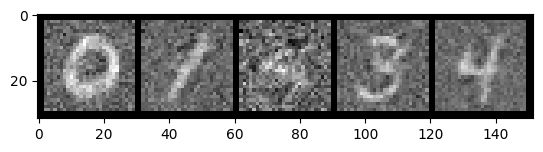

Starting Epoch 83/100
[1000/1875]Disc loss : 0.5296885967254639 Gen Loss : 2.26554536819458


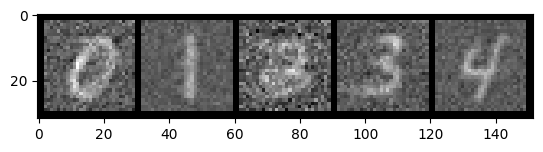

Starting Epoch 84/100
[1000/1875]Disc loss : 0.611262857913971 Gen Loss : 2.5871729850769043


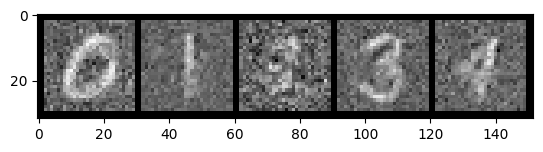

Starting Epoch 85/100
[1000/1875]Disc loss : 0.45570218563079834 Gen Loss : 2.4425108432769775


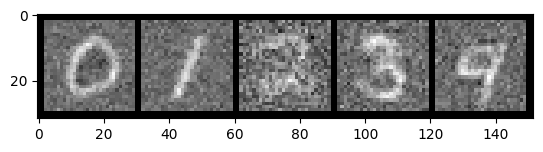

Starting Epoch 86/100
[1000/1875]Disc loss : 0.42724549770355225 Gen Loss : 2.592367172241211


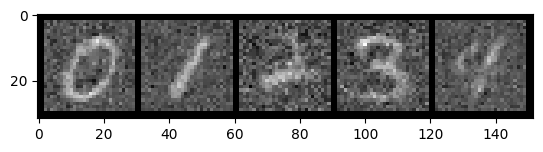

Starting Epoch 87/100
[1000/1875]Disc loss : 0.8357816934585571 Gen Loss : 2.5174694061279297


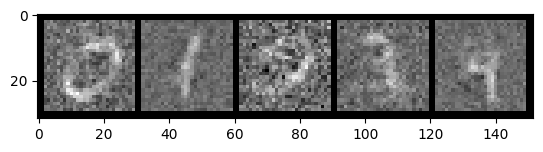

Starting Epoch 88/100
[1000/1875]Disc loss : 0.45595788955688477 Gen Loss : 2.7389659881591797


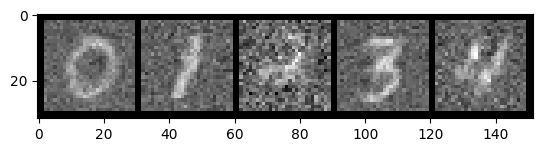

Starting Epoch 89/100
[1000/1875]Disc loss : 0.6581500768661499 Gen Loss : 2.281519889831543


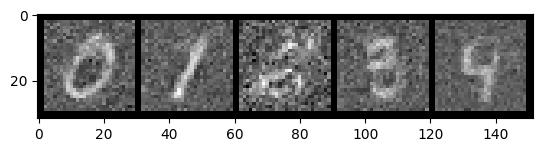

Starting Epoch 90/100
[1000/1875]Disc loss : 0.5449357032775879 Gen Loss : 3.310248374938965


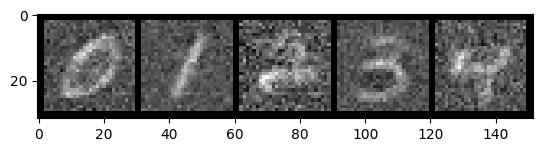

Starting Epoch 91/100
[1000/1875]Disc loss : 0.5176929831504822 Gen Loss : 2.3553237915039062


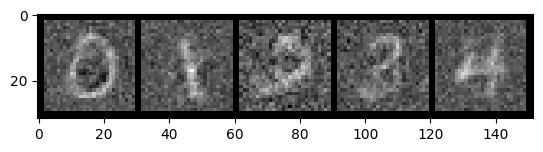

Starting Epoch 92/100
[1000/1875]Disc loss : 0.4352438747882843 Gen Loss : 2.9128944873809814


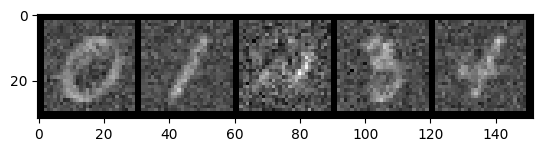

Starting Epoch 93/100
[1000/1875]Disc loss : 0.5982613563537598 Gen Loss : 2.2407593727111816


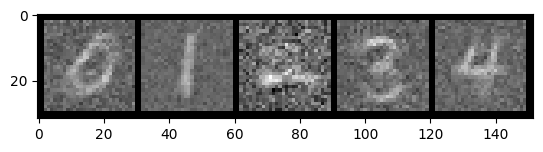

Starting Epoch 94/100
[1000/1875]Disc loss : 0.333671510219574 Gen Loss : 2.1710288524627686


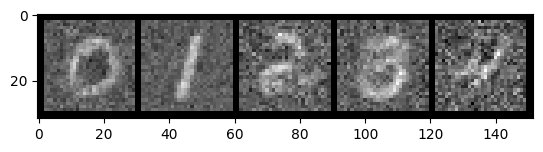

Starting Epoch 95/100
[1000/1875]Disc loss : 0.365968257188797 Gen Loss : 2.6647825241088867


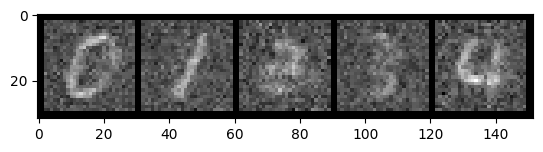

Starting Epoch 96/100
[1000/1875]Disc loss : 0.6308963298797607 Gen Loss : 2.728134870529175


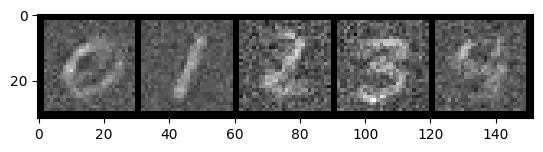

Starting Epoch 97/100
[1000/1875]Disc loss : 0.5088917016983032 Gen Loss : 2.8762378692626953


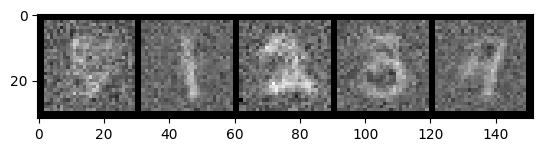

Starting Epoch 98/100
[1000/1875]Disc loss : 0.7446025609970093 Gen Loss : 2.4890341758728027


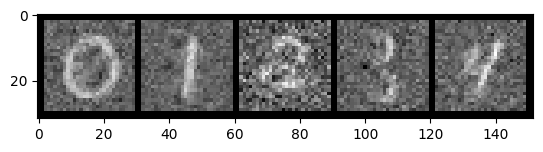

Starting Epoch 99/100
[1000/1875]Disc loss : 0.6291301250457764 Gen Loss : 2.7106199264526367


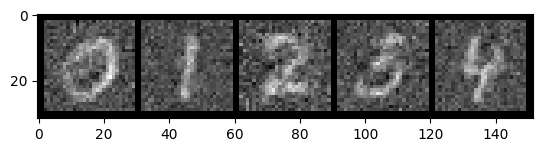

In [8]:
#Define the traininng loop
plt.figure(figsize=(5,5))
for i in range(num_epochs):
  print(f"Starting Epoch {i}/{num_epochs}")
  for iter, (x,label) in enumerate(loader):
    latent_noise = torch.randn(batch_size,latent_dim).to(device)
    x = x.view(x.shape[0],-1).to(device)
    label = label.to(device) #batch_size , labels

    output_G = gen(latent_noise,label)
    # print(output_G.S)
    validity = disc(output_G, label)
    # print(validity.shape)
    lossG = criterion(validity,torch.ones_like(validity))

    gen.zero_grad()
    lossG.backward()
    opt_gen.step()

    #Discriminator training
    disc.zero_grad()
    disc_real = disc(x,label).view(-1)
    disc_real_loss = criterion(disc_real,torch.ones(batch_size).to(device))

    latent_noise_2 = torch.randn(batch_size,latent_dim).to(device)

    #second part of the loss function
    fake_gen = gen(latent_noise_2,label)

    disc_fake = disc(fake_gen,label).view(-1)
    disc_fake_loss = criterion(disc_fake,torch.zeros_like(disc_fake))
    discLoss = disc_real_loss+disc_fake_loss

    discLoss.backward(retain_graph=True)
    #End of discriminator

    opt_disc.step() #calling the optimizer step
    #Generator Training

    if (iter+1)%1000==0:
      print(f"[{iter+1}/{len(loader)}]Disc loss : {discLoss.item()} Gen Loss : {lossG.item()}")

  z = Variable(torch.randn(5, latent_dim)).to(device)
  labels = Variable(torch.LongTensor(np.arange(5))).to(device)
  sample_images = gen(z, labels).view(5,1,28,28)

  grid = make_grid(sample_images, nrow=5, normalize=True).permute(1,2,0).cpu().numpy()


  plt.imshow(grid,cmap="gray")
  plt.show()


Genearting images for all digits

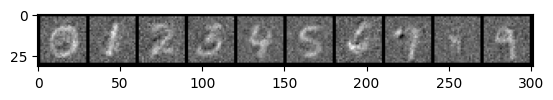

In [9]:

  z = Variable(torch.randn(10, latent_dim)).to(device)
  labels = Variable(torch.LongTensor(np.arange(10))).to(device)
  sample_images = gen(z, labels).view(10,1,28,28)

  grid = make_grid(sample_images, nrow=10, normalize=True).permute(1,2,0).cpu().numpy()


  plt.imshow(grid,cmap="gray")

For the 5th digit

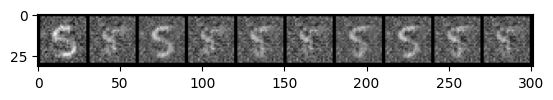

In [10]:
z = Variable(torch.randn(10, latent_dim)).to(device)
labels = Variable(torch.Tensor([5 for i in range(10)])).to(device)
sample_images = gen(z, labels).view(10,1,28,28)

grid = make_grid(sample_images, nrow=10, normalize=True).permute(1,2,0).cpu().numpy()


plt.imshow(grid,cmap="gray")
# labels = Variable(torch.LongTensor(np.arange(10))).to(device)

3rd digit

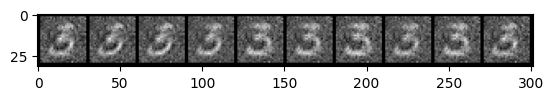

In [11]:
z = Variable(torch.randn(10, latent_dim)).to(device)
labels = Variable(torch.Tensor([3 for i in range(10)])).to(device)
sample_images = gen(z, labels).view(10,1,28,28)

grid = make_grid(sample_images, nrow=10, normalize=True).permute(1,2,0).cpu().numpy()


plt.imshow(grid,cmap="gray")
# labels = Variable(torch.LongTensor(np.arange(10))).to(device)

1st digit

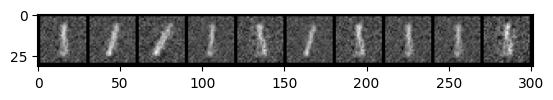

In [12]:
z = Variable(torch.randn(10, latent_dim)).to(device)
labels = Variable(torch.Tensor([1 for i in range(10)])).to(device)
sample_images = gen(z, labels).view(10,1,28,28)

grid = make_grid(sample_images, nrow=10, normalize=True).permute(1,2,0).cpu().numpy()


plt.imshow(grid,cmap="gray")
# labels = Variable(torch.LongTensor(np.arange(10))).to(device)